# Assignment 3: Exploratory Data Analysis
### Joe Leonard (ymd3tv) - DS 3001

**Q1.** In class, we talked about how to compute the sample mean of a variable $X$,
$$
m(X) = \dfrac{1}{N} \sum_{i=1}^N x_i
$$
and sample covariance of two variables $X$ and $Y$,
$$
\text{cov}(X,Y) = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))(y_i - m(Y))).
$$
Recall, the sample variance of $X$ is
$$
s^2 = \dfrac{1}{N} \sum_{i=1}^N (x_i - m(X))^2.
$$
It can be very helpful to understand some basic properties of these statistics. If you want to write your calculations on a piece of paper, take a photo, and upload that to your GitHub repo, that's probably easiest.

1. Show that $m(a + bX) = a+b \times m(X)$.
- $m(a+bX) = \frac{1}{N} \sum_{i=1}^N (a + b x_i)$
- $= \frac{1}{N} \left( \sum_{i=1}^N a + \sum_{i=1}^N b x_i \right)$
- $= \frac{1}{N}(Na + b \sum_{i=1}^N x_i)$
- $= a + b \times m(X)$

2. Show that $\text{cov}(X,a+bY) = b \times \text{cov}(X,Y)$
- $\text{cov}(X,a+bY) = \frac{1}{N}\sum_{i=1}^N (x_i - m(X))((a+b y_i) - m(a+bY))$
- $= \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(b(y_i - m(Y)))$
- $= b \times \frac{1}{N}\sum_{i=1}^N (x_i - m(X))(y_i - m(Y))$
- $= b \times \text{cov}(X,Y)$

3. Show that $\text{cov}(a+bX,a+bX) = b^2 \text{cov}(X,X) $, and in particular that $\text{cov}(X,X) = s^2 $.
- $\text{cov}(a+bX,a+bX) = \frac{1}{N}\sum_{i=1}^N ((a+b x_i)-m(a+bX))((a+b x_i)-m(a+bX))$
- $= \frac{1}{N}\sum_{i=1}^N (b(x_i - m(X)))^2$
- $= b^2 \times \frac{1}{N}\sum_{i=1}^N (x_i - m(X))^2$
- $= b^2 s^2$

4. Instead of the mean, consider the median. Consider transformations that are non-decreasing (if $x\ge x'$, then $g(x)\ge g(x')$), like $2+5 \times X$ or $\text{arcsinh}(X)$. Is a non-decreasing transformation of the median the median of the transformed variable? Explain. Does your answer apply to any quantile? The IQR? The range? 
- A non-decreasing transformation $g$ preserves the order of the data. Since the median is the middle value when data is ordered, applying a non-decreasing transformation to each value maintains their relative order. Therefore, the median of $g(X)$ is $g($median$(X))$.
- This also applies to any quantile, since quantiles are based on the order of the data, not the specific values. However, for measures like the IQR or range, which depend on subtraction, the transformation must be linear (of the form $a + bX$) to ensure these measures scale accordingly.

5. Consider a non-decreasing transformation $g()$. Is is always true that $m(g(X))= g(m(X))$?
- No, it is not always true that $m(g(X)) = g(m(X))$. 
- The mean is sensitive to the magnitude of each value, not just their order. Non-linear transformations can alter the distribution asymmetrically, so $g(m(X))$ will not generally be equal to $m(g(X))$ unless $g$ is a linear function.


**Q2.** This question looks at financial transfers from foreign entities to American universities. In particular, from which countries and giftors are the gifts coming from, and to which institutions are they going? For this question, `.groupby([vars]).count()` and `.groupby([vars]).sum()` will be especially useful to tally the number of occurrences and sum the values of those occurrences.

1. Load the `./data/ForeignGifts_edu.csv` dataset.

In [1]:
import pandas as pd

# Loading in the Data
fin_data = pd.read_csv('./data/ForeignGifts_edu.csv')

2. For `Foreign Gift Amount`, create a histogram and describe the variable. Describe your findings.

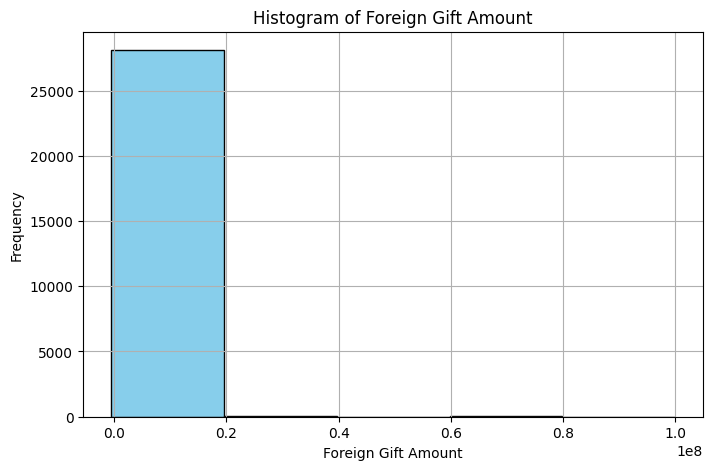

In [7]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8, 5))
plt.hist(fin_data['Foreign Gift Amount'], bins=5, color='skyblue', edgecolor='black')
plt.title('Histogram of Foreign Gift Amount')
plt.xlabel('Foreign Gift Amount')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

There is too much of a cluster between 0.0 and 0.2 for gift amount. What this shows is that there are some outliers that may be messing with out data that once we get rid of, we'll have more of a normal distribution.

3. For `Gift Type`, create a histogram or value counts table. What proportion of the gifts are contracts, real estate, and monetary gifts?

In [9]:
# Value Counts Table
gift_counts = fin_data['Gift Type'].value_counts()
print(gift_counts)

# Printing Proportions
gift_proportions = fin_data['Gift Type'].value_counts(normalize=True) * 100
print(gift_proportions)


Gift Type
Contract         17274
Monetary Gift    10936
Real Estate         11
Name: count, dtype: int64
Gift Type
Contract         61.209737
Monetary Gift    38.751285
Real Estate       0.038978
Name: proportion, dtype: float64


Based on the value counts:

- Contracts: 61.2%
- Real Estate: 0.04%
- Monetary Gifts: 38.8%

Contracts are the most common type, accounting for the largest proportion of the data, while real estate gifts are the least frequent. This distribution indicates that most foreign contributions do not involve property and are instead made from formal contracts.


4. Create a kernel density plot of the log of `Foreign Gift Amount`, and then a kernel density plot of the log of `Foreign Gift Amount` conditional on gift type. Do you notice any patterns?

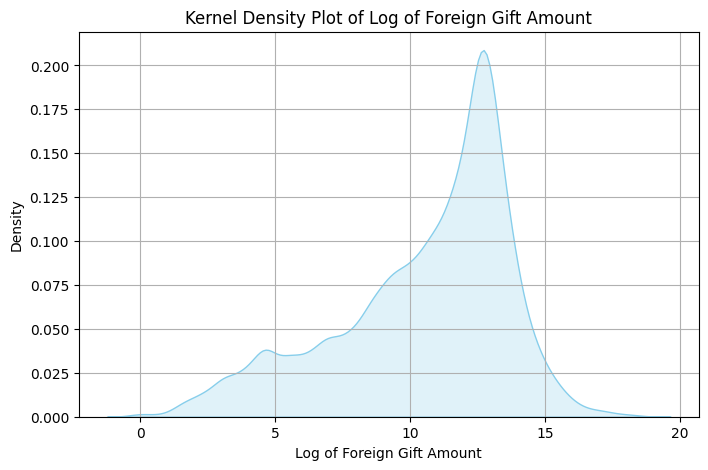

In [11]:
import numpy as np
import seaborn as sns

fin_data = fin_data[fin_data['Foreign Gift Amount'] > 0]
plt.figure(figsize=(8, 5))
sns.kdeplot(np.log(fin_data['Foreign Gift Amount']), fill=True, color='skyblue')
plt.title('Kernel Density Plot of Log of Foreign Gift Amount')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.show()

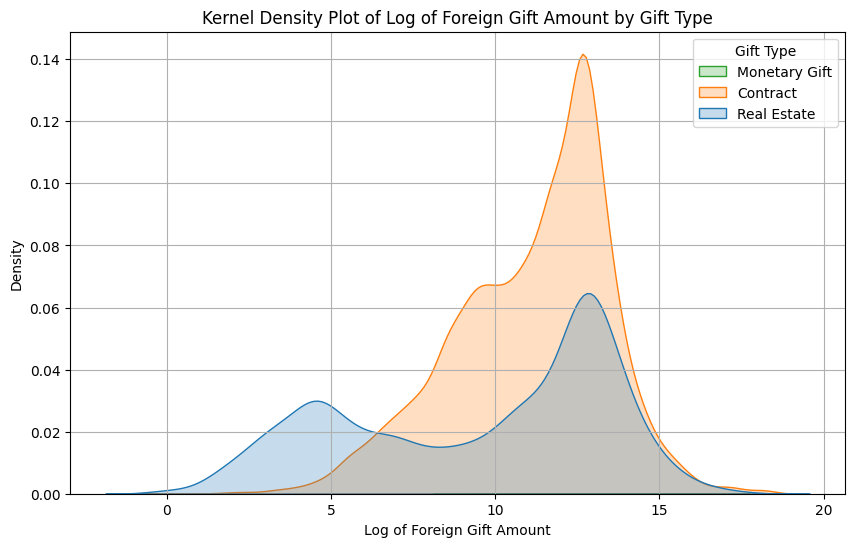

In [14]:
plt.figure(figsize=(10, 6))
sns.kdeplot(data=fin_data, x=np.log(fin_data['Foreign Gift Amount']), hue='Gift Type', fill=True, legend=True)
plt.title('Kernel Density Plot of Log of Foreign Gift Amount by Gift Type')
plt.xlabel('Log of Foreign Gift Amount')
plt.ylabel('Density')
plt.grid(True)
plt.legend(title='Gift Type', labels=fin_data['Gift Type'].unique())
plt.show()

It seems as though the 'Contract' gifts are what makes up most of the graph when not dividing by gift type. This makes a lot of sense as we calculated earlier that 62% of gifts are contracts. We also can't find 'Monetary Gifts' which is interesting as we calculated they make up ~31% of gifts given. 

5. What are the top 15 countries in terms of the number of gifts? What are the top 15 countries in terms of the amount given?

In [15]:
# Top 15 Countries in Number of Gifts
top_15_gift_count = fin_data['Country of Giftor'].value_counts().head(15)
print(top_15_gift_count)

Country of Giftor
ENGLAND            3654
CHINA              2461
CANADA             2344
JAPAN              1891
SWITZERLAND        1676
SAUDI ARABIA       1610
FRANCE             1433
GERMANY            1393
HONG KONG          1080
SOUTH KOREA         811
QATAR               693
THE NETHERLANDS     512
KOREA               452
INDIA               434
TAIWAN              381
Name: count, dtype: int64


In [ ]:
# Top 15 Countries in Amount Given
top_15_gift_amount = fin_data.groupby('Country of Giftor')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_gift_amount)


Country of Giftor
QATAR                   2706240869
ENGLAND                 1464933703
CHINA                   1237952112
SAUDI ARABIA            1065205930
BERMUDA                  899593972
CANADA                   898160656
HONG KONG                887402529
JAPAN                    656325544
SWITZERLAND              619899445
INDIA                    539556490
GERMANY                  442484396
UNITED ARAB EMIRATES     431396357
FRANCE                   405925834
SINGAPORE                401157692
AUSTRALIA                248409202
Name: Foreign Gift Amount, dtype: int64


6. What are the top 15 institutions in terms of the total amount of money they receive? Make a histogram of the total amount received by all institutions. 

In [17]:
# Top 15 Institutions by Amount Received
top_15_institutions = fin_data.groupby('Institution Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_15_institutions)


Institution Name
Carnegie Mellon University                       1477922504
Cornell University                               1289937761
Harvard University                                954803610
Massachusetts Institute of Technology             859071692
Yale University                                   613441311
Texas A&M University                              521455050
Johns Hopkins University                          502409595
Northwestern University                           402316221
Georgetown University                             379950511
University of Chicago (The)                       364544338
University of Colorado Boulder                    360173159
Duke University                                   343699498
Brigham Young University                          323509863
Stanford University                               319561362
University of Texas MD Anderson Cancer Center     301527419
Name: Foreign Gift Amount, dtype: int64


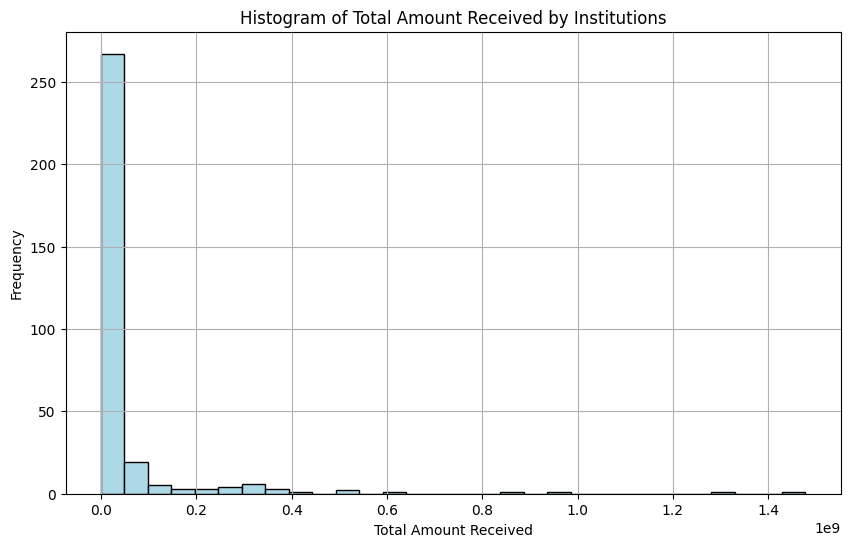

In [19]:
# Total Amount Received by All Institutions
institution_totals = fin_data.groupby('Institution Name')['Foreign Gift Amount'].sum()

plt.figure(figsize=(10, 6))
plt.hist(institution_totals, bins=30, color='lightblue', edgecolor='black')
plt.title('Histogram of Total Amount Received by Institutions')
plt.xlabel('Total Amount Received')
plt.ylabel('Frequency')
plt.grid(True)
plt.show()

7. Which giftors provide the most money, in total?

In [20]:
# Top Giftor
top_giftors = fin_data.groupby('Giftor Name')['Foreign Gift Amount'].sum().sort_values(ascending=False).head(15)
print(top_giftors)

Giftor Name
Qatar Foundation                       1166503744
Qatar Foundation/Qatar National Res     796197000
Qatar Foundation for Education          373945215
Anonymous                               338793629
Saudi Arabian Cultural Mission          275221475
HCL                                     190000000
Church of Jesus Christ of LDS           185203715
Emirates Institute for Advanced Sc      170641244
QIC                                     148355497
Anonymous #9                             96334996
Qatar National Research Fund             79021705
Government of Saudi Arabia               75192434
Contracting Party                        69996984
CMKL University                          67700000
Royal Embassy of Saudi Arabia            67062486
Name: Foreign Gift Amount, dtype: int64


**Q3.** This question uses the Airbnb data to practice making visualizations.

  1. Load the `./data/airbnb_hw.csv` data with Pandas. This provides a dataset of AirBnB rental properties for New York City.  
  2. What are are the dimensions of the data? How many observations are there? What are the variables included? Use `.head()` to examine the first few rows of data.
  3. Cross tabulate `Room Type` and `Property Type`. What patterns do you see in what kinds of rentals are available? For which kinds of properties are private rooms more common than renting the entire property?
  4. For `Price`, make a histogram, kernel density, box plot, and a statistical description of the variable. Are the data badly scaled? Are there many outliers? Use `log` to transform price into a new variable, `price_log`, and take these steps again.
  5. Make a scatterplot of `price_log` and `Beds`. Describe what you see. Use `.groupby()` to compute a desciption of `Price` conditional on/grouped by the number of beds. Describe any patterns you see in the average price and standard deviation in prices.
  6. Make a scatterplot of `price_log` and `Beds`, but color the graph by `Room Type` and `Property Type`. What patterns do you see? Compute a description of `Price` conditional on `Room Type` and `Property Type`. Which Room Type and Property Type have the highest prices on average? Which have the highest standard deviation? Does the mean or median appear to be a more reliable estimate of central tendency, and explain why?
  7. We've looked a bit at this `price_log` and `Beds` scatterplot. Use seaborn to make a `jointplot` with `kind=hex`. Where are the data actually distributed? How does it affect the way you think about the plots in 5 and 6?

**Q4.** This question looks at a time series of the number of active oil drilling rigs in the United States over time. The data comes from the Energy Information Agency.

1. Load `./data/drilling_rigs.csv` and examine the data. How many observations? How many variables? Are numeric variables correctly read in by Pandas, or will some variables have to be typecast/coerced? Explain clearly how these data need to be cleaned.
2. To convert the `Month` variable to an ordered datetime variable, use `df['time'] = pd.to_datetime(df['Month'], format='mixed')`.
3. Let's look at `Active Well Service Rig Count (Number of Rigs)`, which is the total number of rigs over time. Make a line plot of this time series. Describe what you see.
4. Instead of levels, we want to look at change over time. Compute the first difference of  `Active Well Service Rig Count (Number of Rigs)` and plot it over time. Describe what you see.
5. The first two columns are the number of onshore and offshore rigs, respectively. Melt these columns and plot the resulting series.